In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> import data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
from konlpy.tag import Okt
okt = Okt()
train_df = pd.read_excel('movies_modify.xlsx')

> check imported data

In [ ]:
train_df

,score,text
0,1,굳 ㅋ
1,0,GDNTOPCLASSINTHECLUB
2,0,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3,0,지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4,0,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
...,...,...
199995,0,인간이 문제지.. 소는 뭔죄인가..
199996,1,평점이 너무 낮아서...
199997,0,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
199998,1,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


> Data Cleaning

In [ ]:
# eliminating others but Korean and space
train_df['text'] = train_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
train_df['text'] = train_df['text'].str.replace('^ +', "") # null value > empty
train_df

,score,text
0,1,굳 ㅋ
1,0,
2,0,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3,0,지루하지는 않은데 완전 막장임 돈주고 보기에는
4,0,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠
...,...,...
199995,0,인간이 문제지 소는 뭔죄인가
199996,1,평점이 너무 낮아서
199997,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
199998,1,청춘 영화의 최고봉방황과 우울했던 날들의 자화상


> 결측 값 처리

In [ ]:
# text 컬럼이 non-null인 샘플만 train_df에 다시 저장
train_df = train_df[train_df['text'].notnull()]
print('총 샘플의 수 :',len(train_df))

총 샘플의 수 : 199834


In [ ]:
# document 열의 중복 제거
train_df.drop_duplicates(subset=['text'], inplace=True)
# 중복이 제거되었는지 전체 샘플 수를 확인
print('현재 댓글의 수 :',len(train_df))

현재 댓글의 수 : 190973


> 긍정과 부정 샘플링 비율 확인

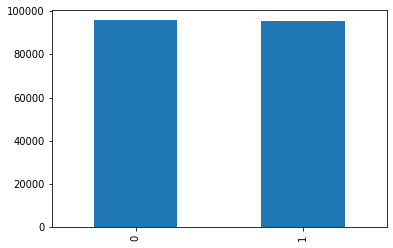

In [ ]:
train_df['score'].value_counts().plot(kind = 'bar')

> 수집된 데이터를 학습용과 테스트 용으로 분리

In [ ]:
exam = train_df['text'] # 시리즈 객체로 저장
ox = train_df['score']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(exam, ox, test_size=0.2, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y))

152778 152778 38195 38195


> TF-IDF 벡터화(단어 빈도-역 문서 빈도: Term Frequency-Inverse Document Frequency)


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
from sklearn.feature_extraction.text import TfidfVectorizer
# 벡터화: 딥러닝을 위한 문자를 숫자로
tfv = TfidfVectorizer(tokenizer=okt.morphs,
                      ngram_range=(1,2),
                      stop_words=stopwords)
tfv.fit(train_x) # 학습시키기
tfv_train_x = tfv.transform(train_x)
tfv_train_x

  (0, 943953)	0.14290642686807103
  (0, 943942)	0.11252801961386406
  (0, 927569)	0.14290642686807103
  (0, 927566)	0.13481606271289895
  (0, 916387)	0.13817386722011676
  (0, 916324)	0.06615447686358612
  (0, 899327)	0.14290642686807103
  (0, 898005)	0.052282121002773574
  (0, 885424)	0.14290642686807103
  (0, 885421)	0.13481606271289895
  (0, 884824)	0.13817386722011676
  (0, 884422)	0.07012739476233473
  (0, 868912)	0.14290642686807103
  (0, 868864)	0.0991424843370298
  (0, 832769)	0.13817386722011676
  (0, 832610)	0.059642451663486494
  (0, 821004)	0.14290642686807103
  (0, 821000)	0.12672569855772686
  (0, 820996)	0.13481606271289895
  (0, 820994)	0.13008350306494468
  (0, 802577)	0.14290642686807103
  (0, 802573)	0.1219931389097726
  (0, 725969)	0.09025599838178647
  (0, 725959)	0.13008350306494468
  (0, 725401)	0.12137796066212908
  :	:
  (152777, 670564)	0.14769278286544907
  (152777, 670481)	0.08031571152806849
  (152777, 654030)	0.139330629538481
  (152777, 653208)	0.19781876

> 단어 사전 확인

In [ ]:
#tfv.vocabulary_ # 단어 사전 확인

> 머신러닝 : 본 예제에서는 로지스틱 회귀 (이진분류알고리즘) 모델로 학습


1.   교차검증 5회일 경우, cv = 5





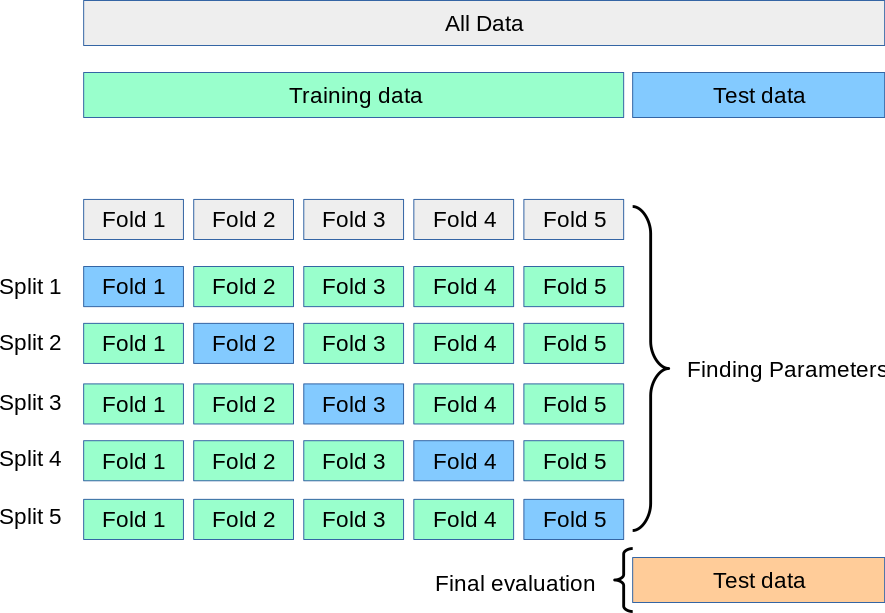

In [ ]:
from sklearn.linear_model import LogisticRegression # 이진 분류 알고리즘
from sklearn.model_selection import GridSearchCV    # 하이퍼 파라미터 최적화
clf = LogisticRegression(random_state=0)
params = {'C': [14]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', verbose=True)
grid_cv.fit(tfv_train_x, train_y)   # 학습하기: 기출문제와 정답 제공
print(grid_cv.best_params_, grid_cv.best_score_)#  가장 적합한 파라메터, 최고 정확도 확인

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 14} 0.859515097587334


> 정답 없이 문제풀어보고 채점하기(교차검증 결과)

In [ ]:
tfv_test_x = tfv.transform(test_x)
test_predict = grid_cv.best_estimator_.predict(tfv_test_x) # 주어진 문제 풀기
from sklearn.metrics import accuracy_score
# 제출된 답안(text_predict)과 정답(text_y)을 채점
print('영화 감성모델의 테스트 정확도 : {:3.2f}%'.format(accuracy_score(test_y, test_predict)*100))

영화 감성모델의 테스트 정확도 : 86.08%


> 감성 예측하기

In [ ]:
import re
input_text = '딱히 대단한 재미도 감동도 없는데 ~! 너무 과대 평과된 영화 중 하나'
print(input_text)
#입력 텍스트에 대한 전처리 수행
input_text = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(input_text)
input_text = [" ".join(input_text)]
# 입력 텍스트의 피처 벡터화
st_tfidf = tfv.transform(input_text)
# 최적 감성 분석 모델에 적용하여 감성 분석 평가
st_predict = grid_cv.best_estimator_.predict(st_tfidf)
#예측 결과 출력
if(st_predict == 1):
    print('예측 결과: ->> 긍정 감성')
else:
    print('예측 결과: ->> 부정 감성')

딱히 대단한 재미도 감동도 없는데 ~! 너무 과대 평과된 영화 중 하나
예측 결과: ->> 부정 감성
